In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from statistics import stdev # to calculate the standard deviation fo a sample

In [2]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

# Standard Deviation of Population is not given

***Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?***

Step 1:<br>
      Alternate Hypothesis(Bold Claim):

$$ H_1 \Rightarrow \mu \neq 500$$

Null Hypothesis():

$$H_0 \Rightarrow \mu = 500$$

Step 2:
 - Collect a sample of size n = 10
$$[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]$$
 - Compute Sample mean
$$\bar{x} = ?$$

Step 3:<br>
Compute test statistic
$$t = \frac{\bar{x} - \mu}{\frac{S}{\sqrt[2]{n}}}$$
We are using t score because population standard deviation is not given

Step 4: Decide $\alpha$ or significance level

Step - 5.1: Two tailed t-test:
        in this case

In [3]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_mean = sum(l)/len(l)
print(sample_mean)

465.3


In [4]:
sample_std = stdev(l)
sample_std

86.84859110991829

In [5]:
n = len(l)
df = n -1 
pop_mean = 500

In [6]:
score_t = t_score(n, sample_mean, pop_mean, sample_std)
score_t

-1.263475128444671

In [7]:
# Two Tail Test

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 9)
print(t_critical)

2.2621571627409915


As you can see the value of t-score is less that t critical so we fail to reject the null hypothesis

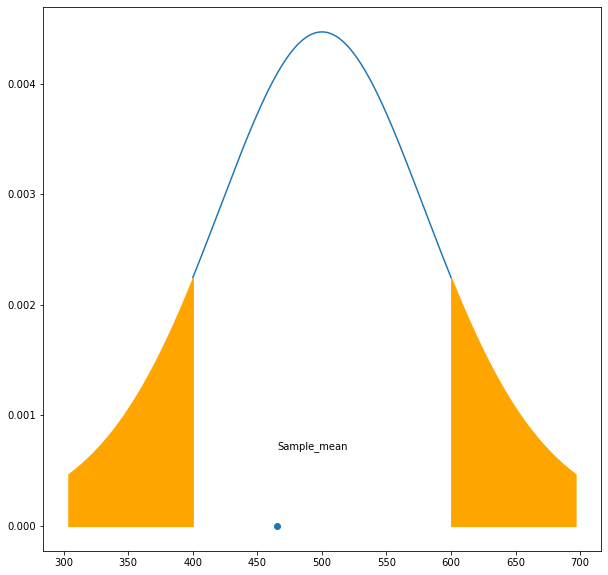

In [8]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 400
x_max = 600
plt.figure(figsize = [10,10])

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 200)
y = t.pdf(x, df,mean, std)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean - (t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("Sample_mean", (sample_mean, 0.0007))

plt.plot(x, y)

plt.show()


In [9]:
# Conclusion using t test

if(np.abs(score_t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

Step 1: State Null and Alternate Hypothesis

Null Hypothesis: $$H_0 \Rightarrow \mu \leq 4$$
Alternate Hypothesis: $$H_1 \Rightarrow \mu > 4$$

**In this case it would be a one tail test**

Step 2: 
 - Collect a sample to gain evidences.
Sample: $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]$$

In [10]:
sample = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sample_size = len(sample)
pop_mean = 4
df = sample_size - 1
sample_std = stdev(sample)

Here, the sample is of size 20

 - Compute Sample Mean, $$\bar{x}\ =\ ?$$ 

In [11]:
sample_mean = np.mean(sample)
sample_mean

4.25

Compute Test statistic:

In our case the population Std is not give so we would go with t test

$$t = \frac{\bar{x} - \mu}{\frac{S}{\sqrt[2]{n}}}$$

In [12]:
score_t = t_score(sample_size, sample_mean, pop_mean, sample_std)
score_t

1.3142574813455419

Step 4: Decide $\alpha$ or significance level

In [13]:
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha, df = sample_size-1)
print(t_critical)

1.729132811521367


In [14]:
# Conclusion using t test

if(np.abs(score_t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5: One Tail test in this case:

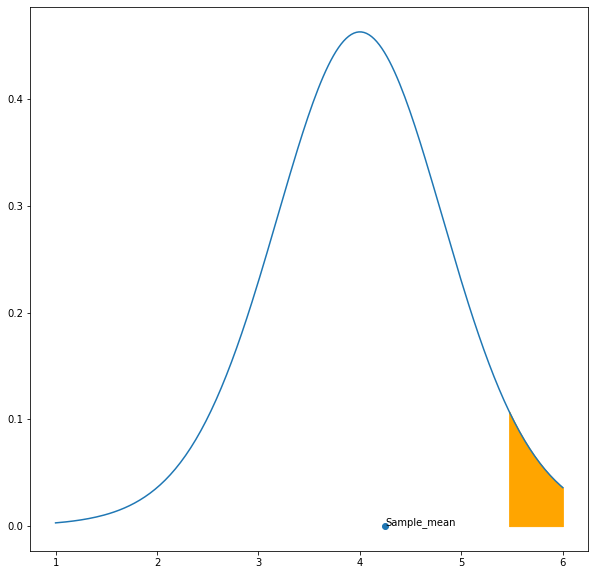

In [15]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 1
x_max = 6
plt.figure(figsize = [10,10])

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 200)
y = t.pdf(x, df,mean, std)


# Computing the left and right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("Sample_mean", (sample_mean, 0.0007))

plt.plot(x, y)

plt.show()


So, as you can see in the above image sample mean is not in the rejection region hence we fail to reject the null hypothesis

**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

Step 1: State Null and Alternate Hypothesis
    
 - Null Hypothesis:
    $$H_0 \Rightarrow \mu \leq 15$$
    
 - Alternate Hypothesis:
    $$H_1 \Rightarrow \mu > 15$$
    

Step 2:<br>
 - Collecting a Sample of size 20<br>
    [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]


In [16]:
sample = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 
          15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

 - Computing sample mean
 $$\bar{x}\ =\ ?$$

In [17]:
sample_mean = np.mean(sample)

In [18]:
sample_std = stdev(sample)
pop_mean = 15
sample_size = len(sample)

Step 3: Computing test - statistc

$$t = \frac{\bar{x} - \mu}{\frac{S}{\sqrt[2]{n}}}$$

Since, population standard deviation ($\sigma$) is not give so sample standar deviation is used

In [19]:
score_t = t_score(sample_size, sample_mean, pop_mean, sample_std)
score_t

0.43178820189079925

Step 5: It would be a one tail test

In [20]:
# It would be a one tail test

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha, df = sample_size-1)
print(t_critical)

1.729132811521367


In [21]:
# Conclusion using t test

if(np.abs(score_t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


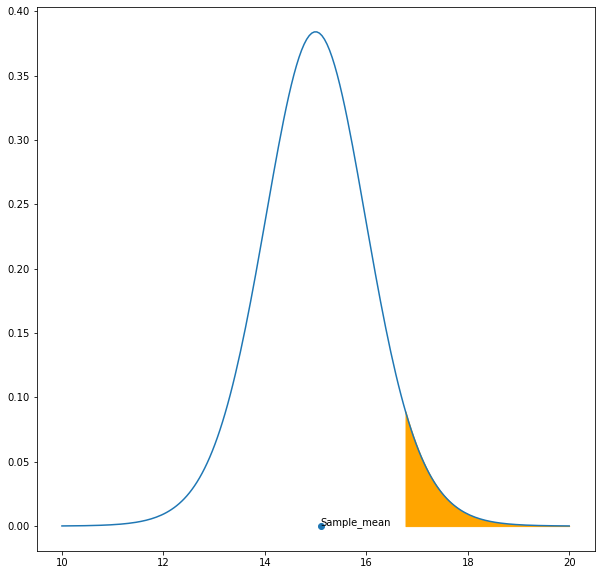

In [22]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 10
x_max = 20
plt.figure(figsize = [10,10])

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 200)
y = t.pdf(x, df,mean, std)


# Computing the left and right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)



# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("Sample_mean", (sample_mean, 0.0007))

plt.plot(x, y)

plt.show()


**Hence with the given evidences, TATA's claim cannot be accepted**

**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?**

Step 1: Compute Null and Alternate hypothesis

 - Null Hypothesis
       

 $$H_0 \Rightarrow \mu \geq 100$$

 - Alternate Hypothesis:
        

$$H_1 \Rightarrow \mu < 100$$

**It would be a one tail test**

Step 2: 
 - Collect a sample of size 10.

$$\bar{x}\ =\ 97.5$$

In [23]:
sample_mean = 97.5
sample_size = 10
pop_mean = 100
sample_std = 10
df = sample_size - 1

Step 3: Computing Test Statistic

`
$$t = \frac{\bar{x} - \mu}{\frac{S}{\sqrt[2]{n}}}$$


In [24]:
score_t = t_score(sample_size, sample_mean, pop_mean, sample_std)
score_t

-0.7905694150420949

In [25]:
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha, df = df)
print(t_critical)

1.8331129326536333


In [26]:
if(np.abs(score_t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


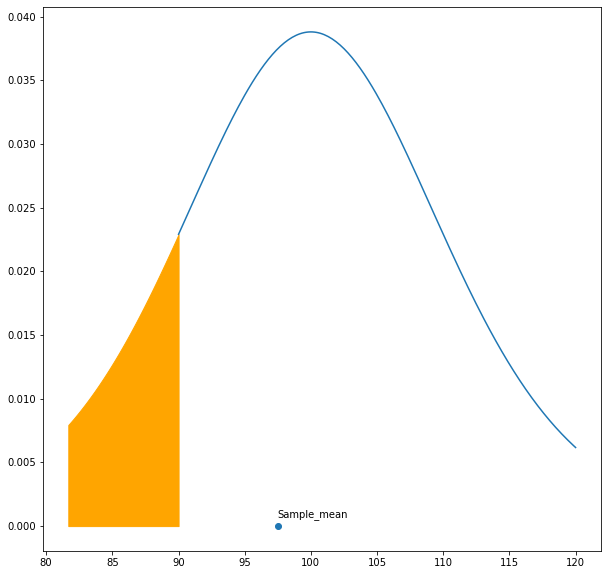

In [27]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 90
x_max = 120
plt.figure(figsize = [10,10])

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 200)
y = t.pdf(x, df,mean, std)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean - (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("Sample_mean", (sample_mean, 0.0007))

plt.plot(x, y)

plt.show()


**Hence, the evidences are not sufficient to prove that my algorithm takes less than 100ms**